In [1]:
//%jsroot on

In [2]:
        int start = 453;
        int stop = 530;
        TChain *fch;
        fch = new TChain("tree", "tele");
        for (int i= start; i<=stop; i++){
          TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtestn15_2/tele%04d.root" , i);
          fch->AddFile(fileName.Data());
        }
        start = 749;
        stop = 809;
        for (int i= start; i<=stop; i++){
          TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtestn15_2/tele%04d.root" , i);
          //fch->AddFile(fileName.Data());
        }

In [3]:
TCanvas *c1=new TCanvas("c1","c1");

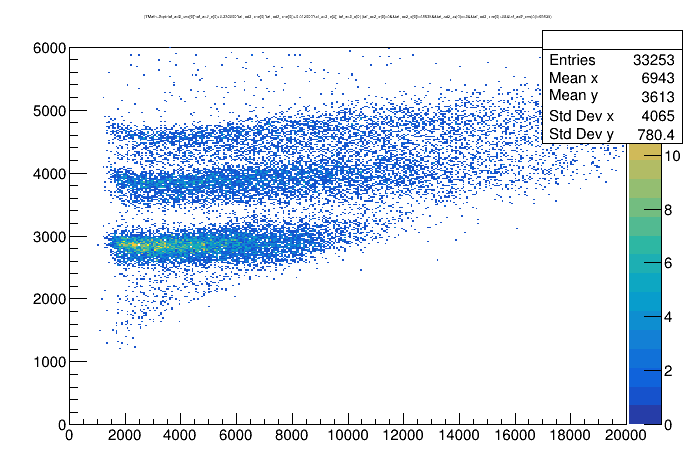

In [4]:
Double_t a=0.23;
Double_t b=0.012;
Double_t c=0;
/******************/
Int_t stripnum=2;
/******************/

c1->Clear();

TString name=TString::Format("(TMath::Sqrt(taf_ad2_xne[0]*taf_ac2_e[0]+%f*taf_ad2_xne[0]*taf_ad2_xne[0])+%f*taf_ac2_e[0]):taf_ac2_e[0]",a,b);
TString drawname=name+">>(300,0,20000,300,0,6000)";
//TString Ef=TString::Format("(TMath::Sqrt(ta.ad3.xne[0]*ta.ad4.xne[0]+%f*ta.ad3.xne[0]*ta.ad3.xne[0])+%f*ta.ad4.xne[0])",a[stripnum],b[stripnum]);
TString cutname_bac=TString::Format("taf_ac2_e[0]>0&&taf_ac2_e[0]!=65535&&taf_ad2_xs[0]==%d&&taf_ad2_xne[0]>0&&taf_ad2_xne[0]!=65535",stripnum);
//TString cutname=cutname_bac+"&&"+Ef+">=13/25*ta.ad4.xne[0]+200";
fch->Draw(drawname.Data(),cutname_bac.Data(),"colz");
c1->Draw();

In [5]:
TFile *fout = new TFile("/home/zhuhy/JNBook/Experiment2022/taf/PIDpeakfind/graph/taf_ad0_sigma.root","recreate");
fout->cd();

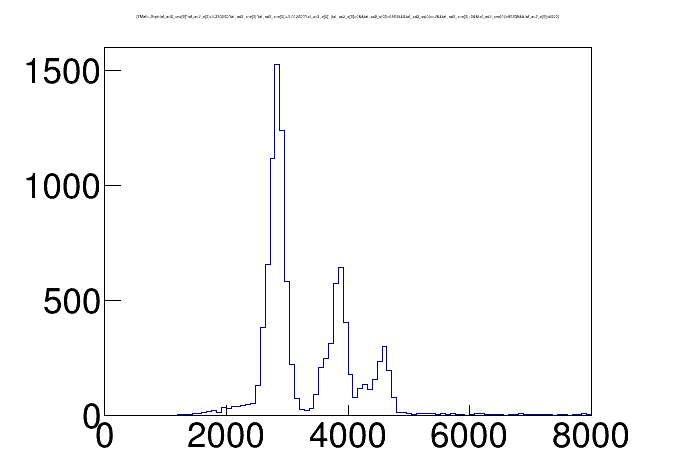

In [6]:
TGraph *sigma = new TGraph();
TGraph *rate = new TGraph();
Int_t count=0,counttemp=0;
TF1 *g1 = new TF1("g1","gaus");
  Int_t left=0,right=8000;
  Double_t nvall;
  Int_t _bin=100,cmin;
  Double_t amin,bmin;
/*
TF1 *fun2peak=new TF1("fun2peak","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)+[3]*TMath::Exp(-0.5*((x-[4])/([2]*1.25))^2)",1300,2000);
  fun2peak->SetParameter(0,4000);
  fun2peak->SetParameter(1,1520);
  fun2peak->SetParameter(2,100);
  fun2peak->SetParameter(3,1800);
  fun2peak->SetParameter(4,1800);
*/
TH1F *h[200];
TString find;
TString canvasname;
Double_t sigmamin=10000,nowmean=0,nvallmin=100;
a=0.23;
b=0.012;
c=0;
Double_t nsigma;
//cutname=cutname+"&&"+Ef+">=13/25*ta.ad4.xne[0]+180";
//for(a=0.1;a<=0.3;a=a+0.01){
//for(b=-0.05;b<=0.00;b=b+0.001){
//for(c=10;c<=40;c=c+1){
drawname=TString::Format("(TMath::Sqrt(taf_ad2_xne[0]*taf_ac2_e[0]+%f*taf_ad2_xne[0]*taf_ad2_xne[0])+%f*taf_ac2_e[0])>>h%d(%d,0,8000)",a,b,count,_bin);
cutname_bac=TString::Format("taf_ac2_e[0]>0&&taf_ac2_e[0]!=65535&&taf_ad2_xs[0]==%d&&taf_ad2_xne[0]>0&&taf_ad2_xne[0]!=65535&&taf_ac2_e[0]<6000",stripnum);
fch->Draw(drawname.Data(),cutname_bac.Data());
find=TString::Format("h%d",count);
h[count]=(TH1F*)gROOT->FindObject(find.Data());
//h[count]->Fit("g1","Q","",3600,4200);
    
nsigma=2;
//h[count]->Fit("g1","Q","",g1->GetParameter(1)-nsigma*g1->GetParameter(2),g1->GetParameter(1)+nsigma*g1->GetParameter(2));
//h[count]->Fit("g1","Q","",g1->GetParameter(1)-nsigma*g1->GetParameter(2),g1->GetParameter(1)+nsigma*g1->GetParameter(2));


//if(fun2peak->GetParameter(2)<sigmamin){sigmamin=fun2peak->GetParameter(2);counttemp=count;}
sigma->SetPoint(count,b,g1->GetParameter(2));
nvall=(h[count]->GetBinContent((Int_t)(g1->GetParameter(1)+nsigma*g1->GetParameter(2))*_bin/right+0)+
       h[count]->GetBinContent((Int_t)(g1->GetParameter(1)+nsigma*g1->GetParameter(2))*_bin/right+1)+
       h[count]->GetBinContent((Int_t)(g1->GetParameter(1)+nsigma*g1->GetParameter(2))*_bin/right+2))/3.;
if(g1->GetParameter(2)<sigmamin){sigmamin=g1->GetParameter(2);counttemp=count;nowmean=g1->GetParameter(1);amin=a;bmin=b;}
//if(nvall<nvallmin){nvallmin=nvall;counttemp=count;sigmamin=g1->GetParameter(2);nowmean=g1->GetParameter(1);cmin=c;amin=a;bmin=b;}
rate->SetPoint(count,b,nvall/g1->GetParameter(0));
count++;
//}
h[counttemp]->GetYaxis()->SetNdivisions(5); // 计算需要的刻度数量
h[counttemp]->GetYaxis()->SetNoExponent(true);         // 禁用科学计数法
h[counttemp]->GetXaxis()->SetNdivisions(5); // 计算需要的刻度数量
h[counttemp]->GetXaxis()->SetNoExponent(true);         // 禁用科学计数法
h[counttemp]->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
h[counttemp]->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体

c1->SetLeftMargin(0.15);      // 增加左边距给Y轴标签留空间
c1->SetRightMargin(0.15);     // 适当右边距
c1->SetBottomMargin(0.12);    // 适当底部边距

gStyle->SetOptStat(0);

h[counttemp]->Draw();
canvasname=TString::Format("cmin=%d",cmin); 
c1->SetName(canvasname.Data());
c1->Draw();
c1->Write();
//}

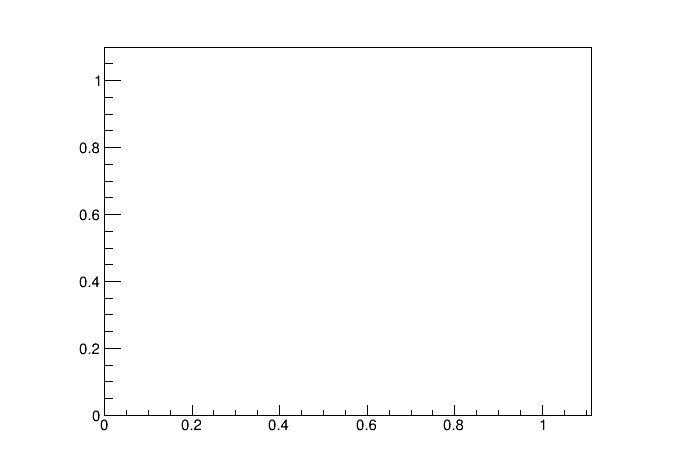

amin=0.23
bmin=0.012
sigmamin=0
nowmean=0


In [7]:

cout<<"amin="<<amin<<'\n';
cout<<"bmin="<<bmin<<'\n';
cout<<"sigmamin="<<sigmamin<<'\n';
cout<<"nowmean="<<nowmean<<'\n';

c1->Clear();
sigma->Draw("");
canvasname=TString::Format("sigma"); 
c1->SetName(canvasname.Data());
c1->Draw();
c1->Write();




In [8]:
/*
c1->Clear();
rate->Draw("");
canvasname=TString::Format("rate"); 
c1->SetName(canvasname.Data());
c1->Draw();
c1->Write();
*/

In [9]:
fout->Close();